## 기술통계

#### 1. 다음은 알렉스 로드리게스(Alex Rodriguez)의 연도별(1994~2016) 홈런 수이다. 연도별 분포를 그리고, 분석하시오.

In [16]:
import pandas as pd

In [17]:
from pandas import read_csv

In [7]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt

In [14]:
import matplotlib as mpl

In [23]:
arod = read_csv('C:/Users/bluei/OneDrive - 한국방송통신대학교/문서/KNOU/2022-2/Python_R/a-rod.csv')
arod.head()

,Year\t,HR
0,1994,0
1,1995,5
2,1996,36
3,1997,23
4,1998,42


In [29]:
# 시각화를 위해 데이터프레임에서 x, y축 으로 쓸 데이터를 추출
arod_year = arod.iloc[:,0]
arod_hr = arod.iloc[:,1]

<IPython.core.display.Javascript object>


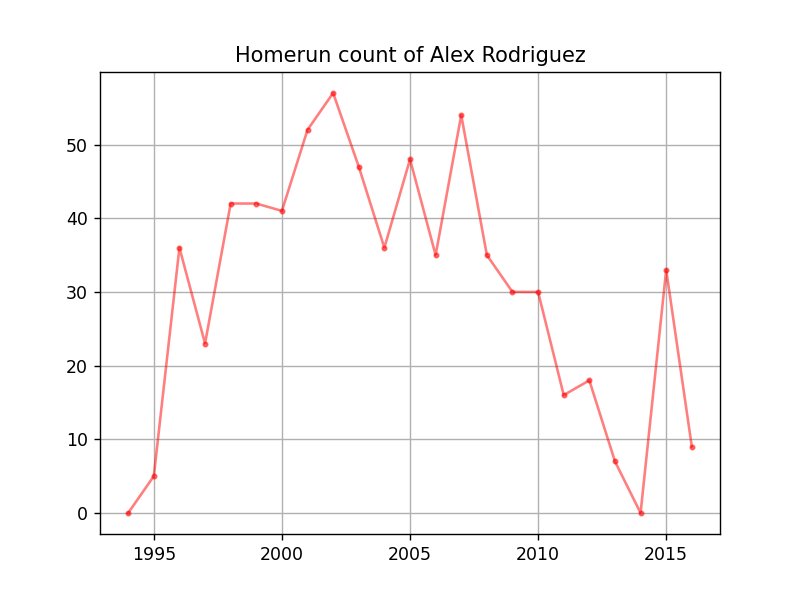

In [40]:
# 연도별 분포 시각화
%matplotlib notebook
plt.figure()
plt.plot(arod_year, arod_hr, alpha = 0.5, ls = '-', color = 'red', marker = '.', ms=5)
plt.title('Homerun count of Alex Rodriguez')
plt.grid(True)

In [36]:
# 기술통계량 계산
arod_hr.describe()

count    23.000000
mean     30.260870
std      17.483024
min       0.000000
25%      17.000000
50%      35.000000
75%      42.000000
max      57.000000
Name: HR, dtype: float64

##### 분석
* Alex Rodriguez는 23년간 활동했고, 최고 성적은 연간 홈런 57회, 최저 성적은 연간 홈런 0회를 기록했다.
* 평균적으로 연간 30회의 홈런을 기록했고, 1996년부터 2010년까지 14년간 평균 성적을 유지했다.
* 1998년부터 2007년까지 약간의 기복이 있지만 꾸준히 좋은 성적을 거두었다.
* 2007년 이후 부진을 면치 못하고 계속된 하락세로 2014년 최저 성적을 기록했으나, 2015년 슬럼프를 극복하고 다시 커리어 평균 이상의 성적을 거두었다.
* 하지만 2016년 다시 부진한 성적을 보이어, 앞으로의 성적에 대한 예상은 비관적이다. 

#### 책 2. IRIS 데이터셋 사용

In [41]:
pip install seaborn

     ------------------------------------- 285.1/285.1 kB 17.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv

In [5]:
# iris 데이터 불러오기
iris = read_csv('C:/Users/bluei/OneDrive - 한국방송통신대학교/문서/KNOU/2022-2/Python_R/iris_dataset.csv')
iris.head(3)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa


In [6]:
# 필요없는 열 삭제
iris_df = iris.drop(iris.columns[0], axis=1)
iris_df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


#### (1) 자료에서 결측치는 0으로 표시되어 있다. 결측치를 제거하는 명령을 쓰고, 각 변수에 결측치가 몇 개 있는지 구하시오.

In [64]:
# 결측치 또는 '0' 값이 없으므로, 일부 값을 '0'으로 변경
iris_sample = iris.replace([1, 2, 3, 4, 5], 0)
iris_na = iris_sample.replace(0, np.nan) # 0 을 결측치로 처리
iris_na.isna().sum() # 변수별 결측치 개수 확인

Unnamed: 0       5
Sepal.Length    10
Sepal.Width     28
Petal.Length    11
Petal.Width     13
Species          0
dtype: int64

In [65]:
iris_dropna = iris_na.dropna(); iris_dropna.isna().sum() # 결측치 제거 명령

Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

#### (2) 변수의 평균, 표준편차, 최솟값, 최댓값, 중앙값, 제1사분위수, 제3사분위수를 구하시오.

In [61]:
iris_dropna.describe() # 변수별 기술통계량 구하기

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### (3) 변수의 상자그림 및 히스토그램을 그리고, 각 변수의 분포를 설명하시오.

In [7]:
iris_df.columns = ['sl', 'sw', 'pl', 'pw', 'spe']
iris_df.head(3)

,sl,sw,pl,pw,spe
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


<IPython.core.display.Javascript object>


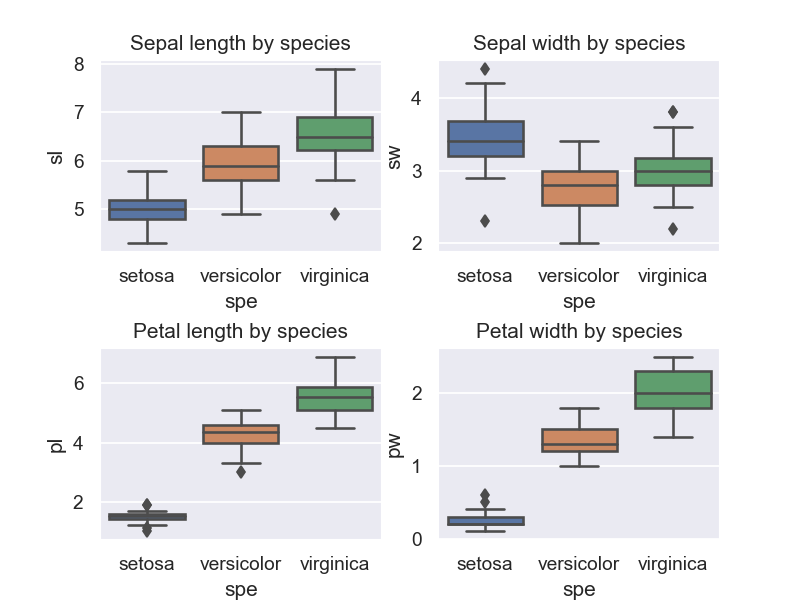

Text(0.5, 1.0, 'Petal width by species')

In [89]:
# 각 변수별 품종에 따른 값 분포를 상자그림으로 그리기
%matplotlib notebook

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.5)

sns.boxplot(x = "spe", y = "sl", data = iris_df, ax = ax1)
ax1.set_title("Sepal length by species", fontsize = 12)

sns.boxplot(x = "spe", y = "sw", data = iris_df, ax = ax2)
ax2.set_title("Sepal width by species", fontsize = 12)

sns.boxplot(x = "spe", y = "pl", data = iris_df, ax = ax3)
ax3.set_title("Petal length by species", fontsize = 12)

sns.boxplot(x = "spe", y = "pw", data = iris_df, ax = ax4)
ax4.set_title("Petal width by species", fontsize = 12)

In [107]:
# 각 변수 별 품종에 따른 값 분포를 히스토그램으로 그리기

%matplotlib notebook

# 품종별 변수값을 따로 추출
set_sl = iris_df.loc[iris_df.spe=="setosa", 'sl']
ver_sl = iris_df.loc[iris_df.spe=="versicolor", 'sl']
vir_sl = iris_df.loc[iris_df.spe=="virginica", 'sl']

set_sw = iris_df.loc[iris_df.spe=="setosa", 'sw']
ver_sw = iris_df.loc[iris_df.spe=="versicolor", 'sw']
vir_sw = iris_df.loc[iris_df.spe=="virginica", 'sw']

set_pl = iris_df.loc[iris_df.spe=="setosa", 'pl']
ver_pl = iris_df.loc[iris_df.spe=="versicolor", 'pl']
vir_pl = iris_df.loc[iris_df.spe=="virginica", 'pl']

set_pw = iris_df.loc[iris_df.spe=="setosa", 'pw']
ver_pw = iris_df.loc[iris_df.spe=="versicolor", 'pw']
vir_pw = iris_df.loc[iris_df.spe=="virginica", 'pw']

<IPython.core.display.Javascript object>


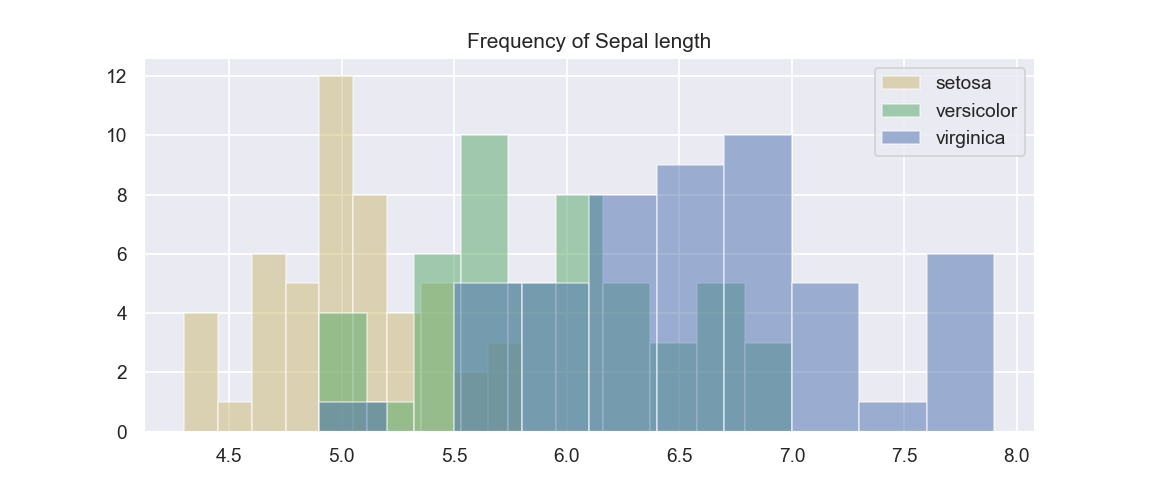

In [109]:
# 품종별 Sepal length 값 히스토그램 그리기
plt.figure(1)
args = dict(alpha=0.5, bins=10)
plt.hist(set_sl, **args, color='y', label='setosa')
plt.hist(ver_sl, **args, color='g', label='versicolor')
plt.hist(vir_sl, **args, color='b', label='virginica')
plt.gca().set(title='Frequency of Sepal length')
plt.legend()

<IPython.core.display.Javascript object>


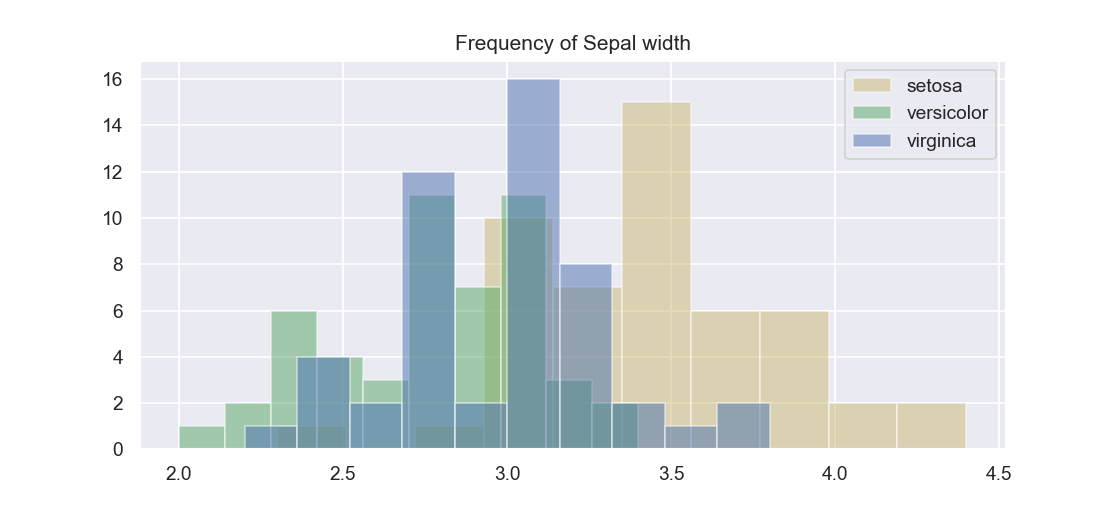

In [111]:
# 품종별 Sepal width 값 히스토그램 그리기 
plt.figure(2)
args = dict(alpha=0.5, bins=10)
plt.hist(set_sw, **args, color='y', label='setosa')
plt.hist(ver_sw, **args, color='g', label='versicolor')
plt.hist(vir_sw, **args, color='b', label='virginica')
plt.gca().set(title='Frequency of Sepal width')
plt.legend()

<IPython.core.display.Javascript object>


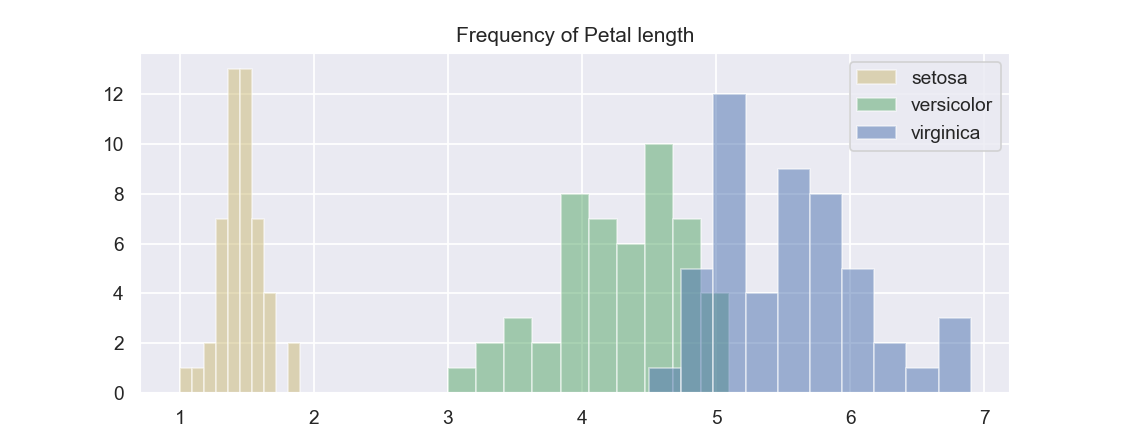

In [113]:
# 품종별 Petal length 값 히스토그램 그리기
plt.figure(3)
args = dict(alpha=0.5, bins=10)
plt.hist(set_pl, **args, color='y', label='setosa')
plt.hist(ver_pl, **args, color='g', label='versicolor')
plt.hist(vir_pl, **args, color='b', label='virginica')
plt.gca().set(title='Frequency of Petal length')
plt.legend()

<IPython.core.display.Javascript object>


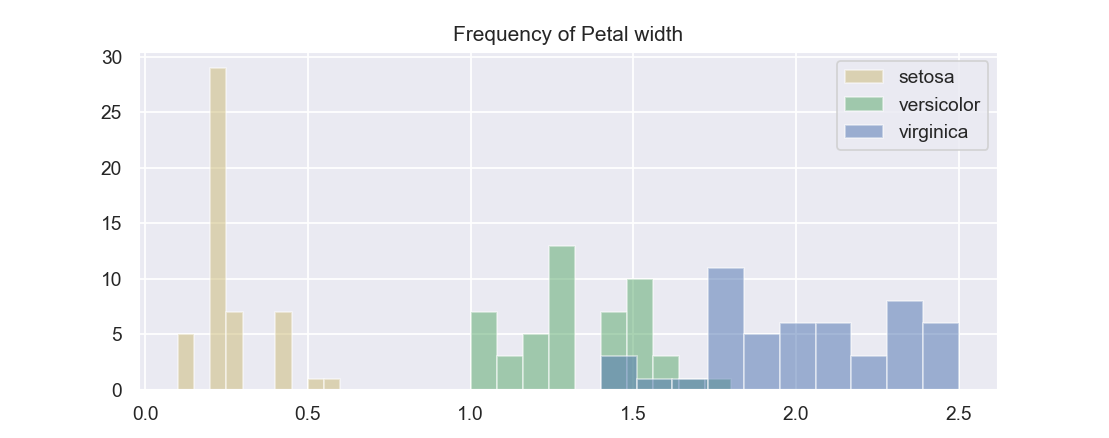

In [114]:
# 품종별 Petal width 값 히스토그램 그리기
plt.figure(4)
args = dict(alpha=0.5, bins=10)
plt.hist(set_pw, **args, color='y', label='setosa')
plt.hist(ver_pw, **args, color='g', label='versicolor')
plt.hist(vir_pw, **args, color='b', label='virginica')
plt.gca().set(title='Frequency of Petal width')
plt.legend()

#### 워크북 8. 파이썬에서 다음과 같이 gender를 구분으로 기술통계를 구하고자 한다. ( ) 안에 들어갈 명령은?

import pandas as pd
score = pd.read_csv("경로")
score["total"] = score["midterm"] + score["final"]
gstat = score.groupby("gender")["total"].describe()
gstat